In [21]:
strategy_name ='培宏量化1号'
off_start = ('close_mtx', 0)

In [22]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import rschLib
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import matplotlib.dates as mdates

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData

In [23]:
#参数：
startDate = 20180101

In [24]:
def dtes2Label(dtes):
    return np.array([datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in dtes])


In [25]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1

In [26]:
with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = rschLib.zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']

In [27]:
v = pd.DataFrame(vol_mtx)
q = np.array(v.rolling(5,axis=1).mean())
q = np.array(q)
lb = np.zeros(vol_mtx.shape)+1
lb[:,1:]=vol_mtx[:, 1:]/q[:,:-1]
lb[np.isfinite(lb)==False]=0

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [28]:
idxTiaoKongGaoKai = np.hstack((np.zeros((open_mtx.shape[0],1))==1,((open_mtx[:,1:] / high_mtx[:,:-1]) - 1 > 0.01)))

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [29]:
name = list(name)
tkrs = list(tkrs)

In [30]:
Ns = 10 # 取每天量比的前多少名
Wl = 500 # 当天收盘价格位于Wl日内的高低点相对位置
Ws = 20 #  当天收盘价格位于Ws日内的高低点相对位置
priceLocL = np.array(np.zeros(close_mtx.shape)) #较长时间内的价格位置
priceLocS = np.array(np.zeros(close_mtx.shape)) #较短时间内的价格位置
preHighL = np.array(np.zeros(close_mtx.shape))
preLowL = np.array(np.zeros(close_mtx.shape))
preHighS = np.array(np.zeros(close_mtx.shape))
preLowS = np.array(np.zeros(close_mtx.shape))
idxZhangtingAtClose = np.array(np.zeros(close_mtx.shape), dtype='bool') # 收盘没有涨停
idxZhangtingAtOpen = np.array(np.zeros(close_mtx.shape), dtype='bool') # 开盘没有涨停
idxZhangtingAtClose[:, 1:] = (close_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095
idxZhangtingAtOpen[:, 1:] = (open_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095

for k in range(1,close_mtx.shape[1]):    
    #长期价格位置
    q = np.max((0, k-Wl))
    preHighL[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowL[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocL[:, k] = (close_mtx[:,k-1]-preLowL[:,k])/(preHighL[:,k]-preLowL[:,k])
    #短期价格位置
    q = np.max((0, k-Ws))
    preHighS[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowS[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocS[:, k] = (close_mtx[:,k-1]-preLowS[:,k])/(preHighS[:,k]-preLowS[:,k])
    

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [31]:
q = list(db.tkrsInfo.find({},{
    'ticker':1,
    'circulateMarketValue20150101':1,
    'circulateMarketValue20160101':1,
    'circulateMarketValue20170101':1,
    'circulateMarketValue20180101':1,
    'circulateMarketValue20190101':1,
    'circulateMarketValue20200101':1,
    'circulateMarketValue':1
}))
cmv2016 = np.zeros(len(tkrs))
cmv2017 = np.zeros(len(tkrs))
cmv2018 = np.zeros(len(tkrs))
cmv2019 = np.zeros(len(tkrs))
cmv2020 = np.zeros(len(tkrs))
cmv = np.zeros(len(tkrs))
for x in q:
    if (x['ticker'] in list(tkrs))==False:
        continue
    if 'circulateMarketValue' in x:
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20160101' in x:
        cmv2016[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20160101']
    if 'circulateMarketValue20170101' in x:
        cmv2017[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20170101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20180101' in x:
        cmv2018[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20180101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20190101' in x:
        cmv2019[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20190101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20200101' in x:
        cmv2020[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20200101']


In [32]:
cmv_threshold = 100e4
wants = list(np.array(tkrs)[cmv2020>cmv_threshold])
off = 1
print('选股池大小：', len(wants))
q = [list(tkrs).index(x) for x in wants]
idxT = [x in q for x in range(len(tkrs))]

选股池大小： 775


In [33]:
idxNST = [('ST' in x)==False for x in name]

In [34]:
startDate = 20180101

In [35]:
tkrs.index('SH600420')
idxT[544]
print(priceLocL[544,-1],preLowL[544,-1], preHighL[544,-1],close_mtx[544,-1])

0.622032818225267 7.987230769230769 11.85 10.46


In [36]:
priceLocThrsMin = 0.1 # 价格大于近期的priceLocthrsMin位置
priceLocThrsMax = 0.5 # 价格小于近期的priceLocthrsMax位置
lbMax = 30 # 量比允许最大值
db.strategyBackTestTrades.remove({'strategy_name':strategy_name})
k0  = np.nonzero(dtes>startDate)[0][1]
pnl1 = []
pnl2 = []
pnl3 = []
pnl4 = []
pnl5 = []
tradesCount = []
ll = list(tkrs)
nn = list(name)
dtesUsed = []
f = open("output.txt", "w")
sp = close_mtx.shape[1]-1
for k in range(k0, close_mtx.shape[1]):
    # 跳空高开， 价格位置
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]>0.1) & (priceLocL[:, k]<0.9)
    # 跳空高开
    idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.5) 
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.2)
    #选择高量比
    m = np.nonzero(idxQ==True)[0]
    lbm = lb[m,k]  
    lidx = m[np.argsort(lbm)[::-1]] #得到哪些股票在idxQ中存在且量比排名前十
    if (len(lidx)>10):
        lidx=lidx[:10]
    idxQ2 = np.zeros(idxQ.shape)==1
    idxQ2[lidx]=True
    
    t  = np.nonzero(idxQ2)[0]
    m = np.array(tkrs)[t]
    #qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1).limit(10))
    qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1))
    q = []
    qs = []
    for x in qt:
        if (x['sale1']==0):
            print('忽略涨停股：',x['StockName'],dtes[k], x['dateTime'])
            continue
        if (x['close']/x['sectional_open']-1 < 0):
            continue
        if (k<sp) & (idxZhangtingAtOpen[ll.index(x['ticker']), np.min((k+1, sp))]==True):
            print(x['ticker'], dtes[k],' 第二日开盘涨停不买')
            continue
        if x['ticker'] in qs:
            continue
        q.append(x)
        qs.append(x['ticker'])
    if (len(q)==0):
        continue
    mk = [x['ticker'] for x in q]
    q0 = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 34260000}, {'ticker':1, 'close':1, 'lb':1}))
    qc = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 53940000}, {'ticker':1, 'close':1, 'lb':1}))
    m0 = [x['ticker'] for x in q0]
    mc = [x['ticker'] for x in qc]
    index0 = [m0.index(x) for x in mk]
    indexc = [mc.index(x) for x in mk]
    close0930 = np.array([x['close'] for x in q0])[index0]
    close1500 = np.array([x['close'] for x in qc])[indexc]
    close0935  = np.array([x['close'] for x in q])
    sn = [x['ticker'] for x in q]
    idx = [ll.index(x['ticker']) for x in q]
    lbm = np.array([x['lb'] for x in q])
    pLocL = priceLocL[idx, k]
    pLocS = priceLocS[idx, k]
    close_today = close_mtx[idx, k]  # 今天收盘
    open_today = open_mtx[idx, k]    # 今天开盘
    close_tomorrow = close_mtx[idx, np.min((k+1,sp))] # 明天收盘
    if k+1<sp: # 明天开盘
        open_tomorrow = open_mtx[idx, k+1]
    else:
        open_tomorrow = close_mtx[idx, sp]
    if k+2<sp:
        open_p3 = open_mtx[idx, k+2]   # 后天开盘
    else:
        open_p3 = close_mtx[idx, sp]   # 后天开盘
    close_p3 = close_mtx[idx, np.min((k+2,sp))]  # 后天收盘
    close_yesterday = close_mtx[idx, k-1]
    close_yesterday2 = close_mtx[idx, k-2]
    isZhangTing = idxZhangtingAtClose[idx, k]
    
    # r1: 第一天入场到收盘
    # r2: 第一天收盘到第二天开盘
    # r3: 第二天开盘到第二天收盘
    # r4: 第二天收盘到第三天开盘
    # r5: 第三天开盘到第三天收盘
    r1 = np.mean(close1500/close0935 - 1)
    r2 = np.mean(open_tomorrow/close_today  - 1)
    r3 = np.mean(close_tomorrow/open_tomorrow - 1)
    r4 = np.mean(open_p3/close_tomorrow - 1)
    r5 = np.mean(close_p3/open_p3 - 1)
    pnl1.append(r1)
    pnl2.append(r2)
    pnl3.append(r3)
    pnl4.append(r4)
    pnl5.append(r5)
    tradesCount.append(len(close1500))
    dtesUsed.append(dtes[k])
    for (iq,t) in enumerate(sn):
        s = nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+\
        ',价格位置（长期),'+str(np.round(1e4*pLocL[iq])/1e2)+\
        ',价格位置（短期),'+str(np.round(1e4*pLocS[iq])/1e2)+\
        ',cmv2019,'+str(cmv2019[ll.index(t)])+\
        ',cmv2020,'+str(cmv2020[ll.index(t)])+\
        ',cmv2018,'+str(cmv2018[ll.index(t)])+\
        ',第一天涨幅,'+str(close_today[iq]/close_yesterday[iq]-1)+\
        ',开盘涨幅（9:30-9:35）,'+str(close0935[iq]/close0930[iq]-1)+\
        ',入场后到收盘,'+str(close_today[iq]/close0935[iq]-1)+\
        ',第二天开盘涨幅,'+str(open_tomorrow[iq]/close_today[iq]-1)+\
        ',第二天日内涨幅,'+str(close_tomorrow[iq]/open_tomorrow[iq]-1)+\
        ',第二天收盘至第三天开盘,'+str(open_p3[iq]/close_tomorrow[iq]-1)+\
        ',第三天开盘至收盘,'+str(close_p3[iq]/open_p3[iq]-1)+\
        ',昨日涨幅,'+str(close_yesterday[iq]/close_yesterday2[iq]-1)+\
        ',跳空高开幅度,'+str(open_today[iq]/close_yesterday[iq]-1)+\
        ',买入价,'+str(open_tomorrow[iq])+\
        ',卖出价,'+str(close_p3[iq])+\
        ',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1)+\
        ',是否涨停,'+str(isZhangTing[iq])
        f.write(s+'\n')
        print(nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+',进场价格:'+str(open_tomorrow[iq])+',出场价格:'+str(close_p3[iq])+',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1))
        db.strategyBackTestTrades.insert_one({
            'ticker':t,
            'name':nn[ll.index(t)], 
            'dateIn':int(dtes[k]), 
            'strategy_name':strategy_name})
f.close()

忽略涨停股： 首创股份 20180103 2018-01-03 06:55:00
忽略涨停股： 金隅集团 20180103 2018-01-03 06:55:00
忽略涨停股： 重庆钢铁 20180103 2018-01-03 06:55:00
中远海控,20180103,量比,2.0,进场价格:6.99,出场价格:7.22,利润,0.03290414878397696

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.



忽略涨停股： 重庆钢铁 20180104 2018-01-04 06:55:00
常熟银行,20180104,量比,7.0,进场价格:7.38841067229247,出场价格:7.258789432427689,利润,-0.01754385964912286
中国宝安,20180104,量比,3.0,进场价格:6.318245449725515,出场价格:6.210876572802074,利润,-0.016993464052287632
忽略涨停股： 重庆钢铁 20180105 2018-01-05 06:55:00
易见股份,20180105,量比,5.0,进场价格:11.046156716417908,出场价格:13.529850746268654,利润,0.22484689413823267
燕京啤酒,20180105,量比,3.0,进场价格:7.136563958708581,出场价格:7.106828275547295,利润,-0.004166666666666652
忽略涨停股： 重庆钢铁 20180108 2018-01-08 06:55:00
温氏股份,20180108,量比,4.0,进场价格:20.186762235363588,出场价格:20.042136110751255,利润,-0.007164404223227727
忽略涨停股： 易见股份 20180109 2018-01-09 06:55:00
忽略涨停股： 蓝光发展 20180109 2018-01-09 06:55:00
海油工程,20180110,量比,2.0,进场价格:6.537309147463024,出场价格:6.48881278880232,利润,-0.007418397626112627
广电运通,20180111,量比,5.0,进场价格:8.067596320064409,出场价格:7.36853059678014,利润,-0.08665105386416849
万达信息,20180111,量比,4.0,进场价格:13.965946089646803,出场价格:13.048838994537949,利润,-0.06566738044254095
万通发展,20180112,量比,4.0,进场价格:4.9734484685502744,出场价格:4.82745683

华兰生物,20180327,量比,3.0,进场价格:14.862208049841922,出场价格:14.697516019739576,利润,-0.011081262592343877
五矿稀土,20180327,量比,3.0,进场价格:11.363549160671463,出场价格:11.742334132693843,利润,0.033333333333333215
九阳股份,20180327,量比,2.0,进场价格:15.05778380054256,出场价格:15.783246944869523,利润,0.04817861339600471
营口港  ,20180327,量比,2.0,进场价格:2.880982709911937,出场价格:2.909601743454109,利润,0.009933774834437026
航发动力,20180327,量比,2.0,进场价格:26.37062643867384,出场价格:26.90217322019246,利润,0.02015677491601342
华宇软件,20180327,量比,2.0,进场价格:18.841392224760824,出场价格:19.218021843141102,利润,0.019989479221462325
国瓷材料,20180327,量比,2.0,进场价格:12.563225384140683,出场价格:13.005778539102527,利润,0.035226077812828605
太极股份,20180328,量比,6.0,进场价格:18.15708869660914,出场价格:19.563475913571928,利润,0.07745664739884384
中华企业,20180329,量比,4.0,进场价格:4.29955136140707,出场价格:4.29955136140707,利润,0.0
创维数字,20180330,量比,3.0,进场价格:8.50791151819225,出场价格:8.311423954261713,利润,-0.023094688221709014
*ST沈机,20180330,量比,2.0,进场价格:11.25,出场价格:10.91,利润,-0.03022222222222226
联化科技,20180330,量比,1.0,进场价格:10.392

首开股份,20180613,量比,3.0,进场价格:7.083930644163995,出场价格:7.292281545462935,利润,0.02941176470588225
亿帆医药,20180613,量比,2.0,进场价格:17.336250828259896,出场价格:17.095603259849845,利润,-0.013881177123820199
新 和 成,20180621,量比,3.0,进场价格:16.608207385121194,出场价格:16.66511729049568,利润,0.0034266133637921303
海格通信,20180621,量比,3.0,进场价格:7.725650852385357,出场价格:7.735430157261794,利润,0.0012658227848101333
山煤国际,20180621,量比,2.0,进场价格:4.439126365054602,出场价格:4.468985959438378,利润,0.0067264573991032695
上峰水泥,20180621,量比,1.0,进场价格:8.938829669197483,出场价格:8.994989855600817,利润,0.006282722513088812
新奥股份,20180625,量比,2.0,进场价格:10.384228448085988,出场价格:10.669770935201093,利润,0.027497708524289566
东方通,20180625,量比,1.0,进场价格:13.727128523650261,出场价格:14.575097945532727,利润,0.06177325581395343
忽略涨停股： 中国软件 20180627 2018-06-27 06:55:00
忽略涨停股： 神州信息 20180627 2018-06-27 06:55:00
太极股份,20180627,量比,2.0,进场价格:19.3695967531331,出场价格:20.512720495940954,利润,0.05901639344262288
中国石油,20180627,量比,2.0,进场价格:7.0781477441692555,出场价格:7.1617479143759795,利润,0.01181102362204722

洛阳钼业,20180828,量比,2.0,进场价格:4.783798880447821,出场价格:4.629793282686925,利润,-0.032193158953722545
华东电脑,20180828,量比,2.0,进场价格:18.069141895351372,出场价格:18.458353352440252,利润,0.021540118470651404
忽略涨停股： 海信家电 20180830 2018-08-30 06:55:00
易事特,20180904,量比,3.0,进场价格:4.88164438438916,出场价格:4.80242905969319,利润,-0.016227180527383367
光线传媒,20180904,量比,3.0,进场价格:8.319386700660663,出场价格:8.022971497549237,利润,-0.03562945368171033
忽略涨停股： 号百控股 20180905 2018-09-05 06:55:00
忽略涨停股： 领益智造 20180905 2018-09-05 06:55:00
陕西煤业,20180907,量比,10.0,进场价格:7.394996738045898,出场价格:7.256167012050042,利润,-0.018773466833541974
中国神华,20180907,量比,3.0,进场价格:16.51605164116081,出场价格:16.074445982306244,利润,-0.0267379679144385
忽略涨停股： 许继电气 20180910 2018-09-10 06:55:00
许继电气,20180911,量比,11.0,进场价格:8.26727636192072,出场价格:8.980143305703105,利润,0.0862275449101797
忽略涨停股： 环旭电子 20180913 2018-09-13 06:55:00
中兴通讯,20180913,量比,2.0,进场价格:18.44249802787273,出场价格:18.2435498290823,利润,-0.010787486515641875
中际旭创,20180913,量比,1.0,进场价格:32.13316557757763,出场价格:30.86718428656195

忽略涨停股： 东方通信 20181127 2018-11-27 06:55:00
亿纬锂能,20181127,量比,3.0,进场价格:7.268714401952808,出场价格:7.452400325467861,利润,0.025270758122743597
永辉超市,20181127,量比,1.0,进场价格:7.0776758364750245,出场价格:7.028864278982093,利润,-0.006896551724137945
皖新传媒,20181127,量比,1.0,进场价格:6.612608529705481,出场价格:6.356819947610856,利润,-0.0386819484240688
忽略涨停股： 东方通信 20181128 2018-11-28 06:55:00
横店东磁,20181128,量比,3.0,进场价格:5.935574707429921,出场价格:5.732566451964076,利润,-0.03420195439739415
江苏国信,20181128,量比,3.0,进场价格:7.77,出场价格:7.55,利润,-0.028314028314028294
紫金矿业,20181129,量比,2.0,进场价格:3.2061058166283276,出场价格:3.2824416694051926,利润,0.023809523809523725
海澜之家,20181203,量比,5.0,进场价格:7.699797008547007,出场价格:8.021004273504271,利润,0.04171632896305111
物产中大,20181203,量比,5.0,进场价格:4.654088151855525,出场价格:4.599865765620315,利润,-0.011650485436893288
卫星石化,20181203,量比,5.0,进场价格:10.173025156154315,出场价格:10.133747066748315,利润,-0.0038610038610037423
均胜电子,20181203,量比,4.0,进场价格:17.113707450194564,出场价格:17.113707450194564,利润,0.0
新宝股份,20181203,量比,4.0,进场价格:8.6331983067389

蓝思科技,20190212,量比,3.0,进场价格:6.964116240487159,出场价格:7.161679821777575,利润,0.028368794326241176
工业富联,20190212,量比,3.0,进场价格:12.297901720708882,出场价格:13.527691892779771,利润,0.10000000000000009
利亚德,20190212,量比,2.0,进场价格:6.942899674441282,出场价格:7.099801361999278,利润,0.02259887005649719
广汇能源,20190212,量比,2.0,进场价格:3.782837465564738,出场价格:3.909256198347107,利润,0.03341902313624656
东山精密,20190212,量比,1.0,进场价格:12.945818940810595,出场价格:13.344151831297076,利润,0.030769230769230882
安科生物,20190212,量比,1.0,进场价格:10.289906293296827,出场价格:10.667656157221087,利润,0.03671071953010285
忽略涨停股： 汇顶科技 20190213 2019-02-13 06:55:00
忽略涨停股： 中天科技 20190213 2019-02-13 06:55:00
忽略涨停股： 风华高科 20190213 2019-02-13 06:55:00
忽略涨停股： 京东方Ａ 20190213 2019-02-13 06:55:00
龙蟒佰利,20190213,量比,6.0,进场价格:12.112539861743013,出场价格:12.39067966597563,利润,0.022962962962963074
万润股份,20190213,量比,5.0,进场价格:11.691575814061023,出场价格:11.128827766579247,利润,-0.0481327800829876
长信科技,20190213,量比,4.0,进场价格:5.136841633056909,出场价格:5.069378422116198,利润,-0.013133208255159512
方大特钢,20190213

乐普医疗,20190329,量比,2.0,进场价格:26.882367532269797,出场价格:27.61292030398774,利润,0.027175908923980696
中国重工,20190329,量比,1.0,进场价格:5.980196399345335,出场价格:6.459410801963993,利润,0.08013355592654436
忽略涨停股： 山煤国际 20190401 2019-04-01 06:55:00
忽略涨停股： 云南铜业 20190401 2019-04-01 06:55:00
寒锐钴业,20190401,量比,4.0,进场价格:63.30624888499651,出场价格:69.28517239080175,利润,0.09444444444444455
江西铜业,20190401,量比,4.0,进场价格:16.33589535592173,出场价格:16.33589535592173,利润,0.0
中国巨石,20190401,量比,4.0,进场价格:10.916909067085955,出场价格:11.156314967679947,利润,0.021929824561403688
神火股份,20190401,量比,3.0,进场价格:5.237461294810691,出场价格:5.237461294810691,利润,0.0
兖州煤业,20190401,量比,3.0,进场价格:9.074621400800712,出场价格:9.317474783516163,利润,0.02676181980374648
锡业股份,20190401,量比,3.0,进场价格:13.03,出场价格:12.99,利润,-0.003069838833461125
华侨城Ａ,20190401,量比,3.0,进场价格:7.463603063603062,出场价格:7.956310356310356,利润,0.0660146699266504
三友化工,20190401,量比,3.0,进场价格:7.070174428645443,出场价格:7.209717345000288,利润,0.019736842105263275
忽略涨停股： 置信电气 20190402 2019-04-02 06:55:00
中金岭南,20190402,量比,7.0,进场价格:

中国电影,20190701,量比,3.0,进场价格:15.57898435712963,出场价格:15.39683007849242,利润,-0.01169230769230778
海翔药业,20190702,量比,3.0,进场价格:7.786046831955922,出场价格:7.61323691460055,利润,-0.022194821208384785
东华能源,20190702,量比,2.0,进场价格:8.982282497441147,出场价格:8.87453428863869,利润,-0.01199563794983649
巨星科技,20190703,量比,3.0,进场价格:10.742985074626864,出场价格:10.801850746268654,利润,0.005479452054794498
忽略涨停股： 金达威 20190705 2019-07-05 06:55:00
浙江医药,20190705,量比,5.0,进场价格:10.873033381712625,出场价格:10.673091436865022,利润,-0.01838879159369511
星网锐捷,20190711,量比,4.0,进场价格:22.040299607072694,出场价格:23.815491159135558,利润,0.08054298642533908
忽略涨停股： ST康美   20190712 2019-07-12 06:55:00
博雅生物,20190712,量比,5.0,进场价格:31.782665602553866,出场价格:32.679074221867516,利润,0.028204324663115177
中材科技,20190712,量比,3.0,进场价格:9.794466403162055,出场价格:9.941383399209485,利润,0.014999999999999902
绿地控股,20190712,量比,2.0,进场价格:6.57920634920635,出场价格:6.923968253968255,利润,0.05240174672489073
阳光电源,20190715,量比,2.0,进场价格:9.93034659090909,出场价格:10.119590909090908,利润,0.01905717151454356
大富科技

三安光电,20190910,量比,2.0,进场价格:13.346570972886765,出场价格:13.486012759170654,利润,0.010447761194029681
华友钴业,20190910,量比,2.0,进场价格:27.65,出场价格:27.68,利润,0.0010849909584087492
*ST沈机,20190910,量比,2.0,进场价格:5.85,出场价格:6.38,利润,0.09059829059829072
忽略涨停股： 新奥股份 20190911 2019-09-11 06:55:00
忽略涨停股： 新奥股份 20190912 2019-09-12 06:55:00
海油工程,20190916,量比,5.0,进场价格:5.685836909871243,出场价格:5.409442060085836,利润,-0.04861111111111105
上海石化,20190916,量比,4.0,进场价格:4.401725888324873,出场价格:4.188426395939087,利润,-0.048458149779735615
大族激光,20190916,量比,2.0,进场价格:35.79703534197813,出场价格:36.11540808543097,利润,0.008893829905503248
忽略涨停股： ST康美   20190917 2019-09-17 06:55:00
忽略涨停股： ST康美   20190918 2019-09-18 06:55:00
忽略涨停股： ST康美   20190919 2019-09-19 06:55:00
忽略涨停股： *ST庞大  20190919 2019-09-19 06:55:00
东方时尚,20190919,量比,1.0,进场价格:19.097807807807808,出场价格:20.263633633633635,利润,0.06104500775995869
中铁工业,20190920,量比,3.0,进场价格:10.705333333333334,出场价格:10.517866666666666,利润,-0.017511520737327202
顾家家居,20190920,量比,2.0,进场价格:35.95900108577633,出场价格:34.23320304

忽略涨停股： 当升科技 20191225 2019-12-25 06:55:00
海信视像,20191225,量比,2.0,进场价格:10.64323911382735,出场价格:10.722444614209321,利润,0.007441860465116301
风华高科,20191225,量比,2.0,进场价格:15.03,出场价格:14.67,利润,-0.0239520958083832
华友钴业,20191225,量比,1.0,进场价格:35.98,出场价格:38.85,利润,0.0797665369649807
忽略涨停股： 利亚德 20191226 2019-12-26 06:55:00
忽略涨停股： 天齐锂业 20191226 2019-12-26 06:55:00
世茂股份,20191226,量比,2.0,进场价格:4.281138211382113,出场价格:4.32849593495935,利润,0.011061946902655162
信立泰,20191226,量比,2.0,进场价格:18.74047861507128,出场价格:19.530269857433808,利润,0.04214360041623322
天齐锂业,20191227,量比,2.0,进场价格:27.9,出场价格:30.18,利润,0.08172043010752694
忽略涨停股： 九鼎投资 20191230 2019-12-30 06:55:00
鲁信创投,20191230,量比,4.0,进场价格:16.07570332480818,出场价格:16.21462915601023,利润,0.008641975308642191
忽略涨停股： 隆平高科 20191231 2019-12-31 06:55:00
忽略涨停股： 大北农 20191231 2019-12-31 06:55:00
忽略涨停股： 隆平高科 20200102 2020-01-02 06:55:00
中国建筑,20200102,量比,4.0,进场价格:5.74544,出场价格:5.870760000000001,利润,0.02181208053691286
葛洲坝  ,20200102,量比,3.0,进场价格:6.736686390532545,出场价格:6.619526627218935,利润,-0.01

忽略涨停股： 智慧能源 20200306 2020-03-06 06:55:00
忽略涨停股： 中国西电 20200306 2020-03-06 06:55:00
忽略涨停股： 沙钢股份 20200306 2020-03-06 06:55:00
合盛硅业,20200306,量比,4.0,进场价格:28.871912000000005,出场价格:29.852804000000003,利润,0.033973919011667686
忽略涨停股： 招商轮船 20200309 2020-03-09 06:55:00
忽略涨停股： 鲁信创投 20200309 2020-03-09 06:55:00
中国国航,20200309,量比,3.0,进场价格:7.767146776406035,出场价格:8.11522633744856,利润,0.04481434058898848
鲁信创投,20200310,量比,3.0,进场价格:16.48255754475703,出场价格:15.222301790281328,利润,-0.07645996387718224
忽略涨停股： 中航沈飞 20200311 2020-03-11 06:55:00
韵达股份,20200311,量比,2.0,进场价格:23.404287991498403,出场价格:22.70108926673751,利润,-0.030045721750489807
忽略涨停股： 上实发展 20200313 2020-03-13 06:55:00
忽略涨停股： 青岛啤酒 20200324 2020-03-24 06:55:00
中金黄金,20200324,量比,3.0,进场价格:8.383366336633664,出场价格:8.293544554455446,利润,-0.010714285714285676
紫金矿业,20200324,量比,2.0,进场价格:3.828308823529412,出场价格:3.700698529411765,利润,-0.033333333333333326
老凤祥  ,20200324,量比,2.0,进场价格:40.328955954323,出场价格:38.93559543230016,利润,-0.03454987834549883
劲嘉股份,20200324,量比,1.0,进场价格:8.763

南京新百,20200514,量比,8.0,进场价格:9.59,出场价格:9.07,利润,-0.054223149113659996
重庆百货,20200514,量比,2.0,进场价格:28.843693091372174,出场价格:29.957198344476282,利润,0.03860480866915017
忽略涨停股： ST康美   20200515 2020-05-15 06:55:00
忽略涨停股： 五矿稀土 20200518 2020-05-18 06:55:00
中金黄金,20200518,量比,5.0,进场价格:8.962217821782179,出场价格:9.181782178217821,利润,0.024498886414253684
西部矿业,20200518,量比,4.0,进场价格:5.755169946332738,出场价格:5.49,利润,-0.04607508532423221
广晟有色,20200518,量比,3.0,进场价格:31.1,出场价格:31.31,利润,0.006752411575562611
北方稀土,20200518,量比,3.0,进场价格:9.88,出场价格:9.64,利润,-0.02429149797570851
新奥股份,20200519,量比,3.0,进场价格:9.75250472589792,出场价格:9.850519848771267,利润,0.01005025125628145
东方航空,20200519,量比,2.0,进场价格:4.1337610619469025,出场价格:4.064535398230089,利润,-0.0167464114832534
深圳机场,20200519,量比,2.0,进场价格:7.7530466830466835,出场价格:7.614422604422605,利润,-0.017879948914431676
锦江酒店,20200519,量比,2.0,进场价格:28.116073245167854,出场价格:27.71441505595117,利润,-0.014285714285714235
忽略涨停股： 当升科技 20200520 2020-05-20 06:55:00
先导智能,20200520,量比,3.0,进场价格:42.627153398058255,出场价格:3

广汽集团,20200730,量比,3.0,进场价格:10.810082796688132,出场价格:10.830027598896043,利润,0.0018450184501843658
利亚德,20200730,量比,1.0,进场价格:7.08,出场价格:7.18,利润,0.01412429378531077
忽略涨停股： 中远海控 20200803 2020-08-03 06:55:00
忽略涨停股： 中鼎股份 20200803 2020-08-03 06:55:00
忽略涨停股： 华谊兄弟 20200803 2020-08-03 06:55:00
万达电影,20200803,量比,2.0,进场价格:18.19,出场价格:17.92,利润,-0.014843320505772417
诚志股份,20200803,量比,2.0,进场价格:18.1,出场价格:17.41,利润,-0.03812154696132608
东方明珠,20200803,量比,2.0,进场价格:10.34586998087954,出场价格:10.209483747609942,利润,-0.013182674199623268
碧水源,20200803,量比,1.0,进场价格:8.99,出场价格:8.84,利润,-0.016685205784204737
忽略涨停股： 中鼎股份 20200804 2020-08-04 06:55:00
市北高新,20200804,量比,2.0,进场价格:9.83,出场价格:9.89,利润,0.006103763987792554
盛和资源,20200805,量比,2.0,进场价格:9.19,出场价格:9.6,利润,0.044613710554951114
忽略涨停股： 金 螳 螂 20200806 2020-08-06 06:55:00
忽略涨停股： 协鑫集成 20200806 2020-08-06 06:55:00
忽略涨停股： 中国核建 20200811 2020-08-11 06:55:00
忽略涨停股： 协鑫集成 20200811 2020-08-11 06:55:00
忽略涨停股： 协鑫集成 20200812 2020-08-12 06:55:00
忽略涨停股： 天齐锂业 20200812 2020-08-12 06:55:00
忽略涨停股： 协鑫集成

In [37]:
pnl1 = np.array(pnl1)
pnl2 = np.array(pnl2)
pnl3 = np.array(pnl3)
pnl4 = np.array(pnl4)
pnl5 = np.array(pnl5)
pnl1[np.isfinite(pnl1)==False]=0
pnl2[np.isfinite(pnl2)==False]=0
pnl3[np.isfinite(pnl3)==False]=0
pnl4[np.isfinite(pnl4)==False]=0
pnl5[np.isfinite(pnl5)==False]=0

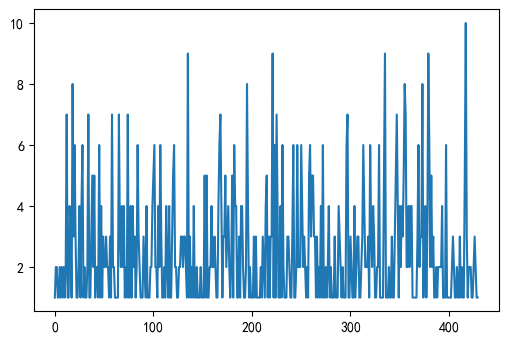

In [38]:
plt.plot(tradesCount)

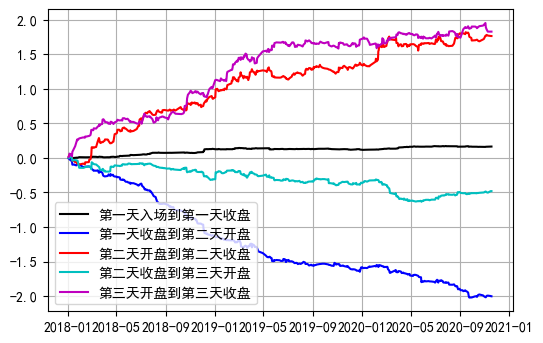

In [39]:
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl1), 'k')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl2), 'b')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl3), 'r')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl4), 'c')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl5), 'm')
plt.legend(['第一天入场到第一天收盘', '第一天收盘到第二天开盘','第二天开盘到第二天收盘','第二天收盘到第三天开盘','第三天开盘到第三天收盘'])
plt.grid()


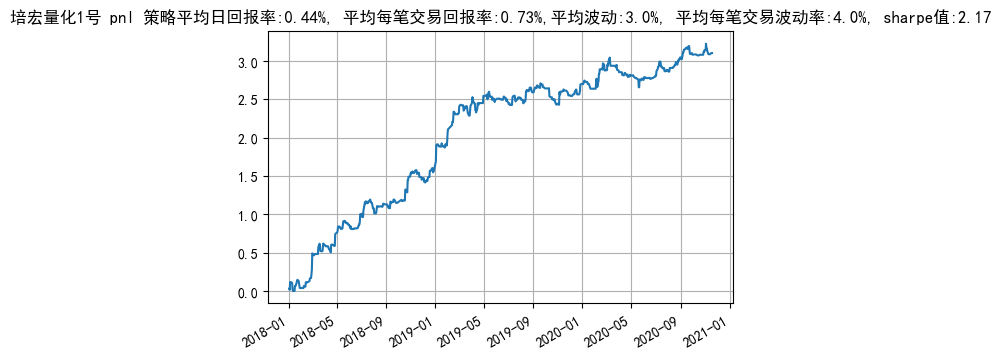

In [40]:
rschLib.drawPNL(dtesUsed, pnl3+pnl4+pnl5,  dtes, strategy_name, toDatabase='yes')

In [41]:
rschLib.saveOffStart(strategy_name, off_start)